In [ ]:
!pip install torch
!pip install tensorflow
!pip install matplotlib
!pip install imageio

In [ ]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader, TensorDataset
from IPython.display import clear_output

### Create sine function data

In [ ]:
# Create sine function data
sampling_rate = 200
x = np.arange(0, 2*sampling_rate + 1) / sampling_rate
y = np.sin(x * np.pi)

### Pytorch framework

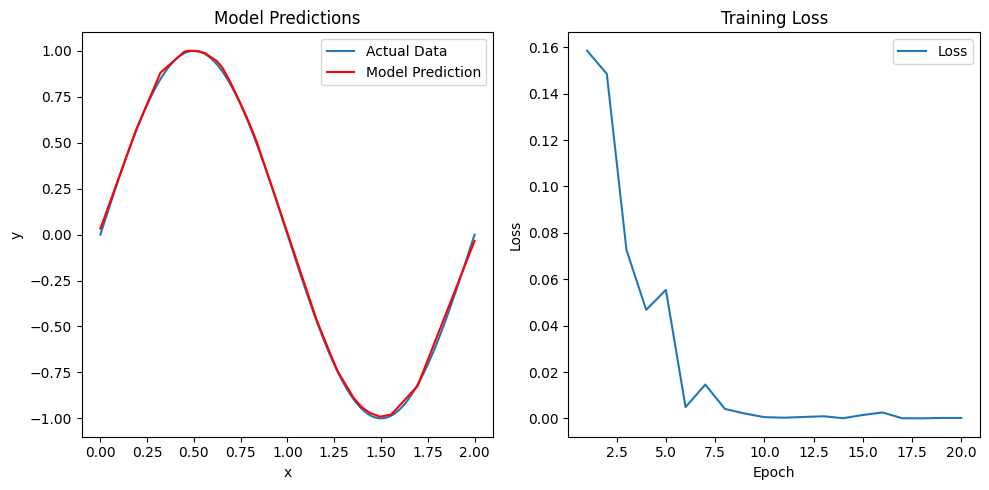

In [ ]:
# Define the neural network model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = torch.nn.Linear(1, 50)
        self.fc2 = torch.nn.Linear(50, 50)
        self.fc3 = torch.nn.Linear(50, 1)

    def forward(self, x):
        # Fully connected layer with relu activation
        x = torch.relu(self.fc1(x))
        # Fully connected layer with relu activation
        x = torch.relu(self.fc2(x))
        # Output layer
        x = self.fc3(x)
        return x

# Instantiate the model
model = Model()
# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# Define the loss function
loss_fn = torch.nn.MSELoss()

# Converting `x` and `y` to tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32)
# Create a TensorDataset and DataLoader to handle mini-batches
dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

losses = []
# Training loop
for epoch in range(20):  # Increase the number of epochs for better visualization
    model.train()  # Set the model to training mode
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()  # Clear the gradients

        # Forward pass
        predictions = model(x_batch).squeeze()
        loss = loss_fn(predictions, y_batch)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()


    # Store the loss value
    losses.append(loss.item())

    # Visualization after each epoch
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        predictions = model(x_tensor).squeeze()

    # Plotting
    clear_output(wait=True)  # Clear the output to update the plot
    plt.figure(figsize=(10, 5))

    # Plot the predictions vs actual data
    plt.subplot(1, 2, 1)
    plt.plot(x_tensor.numpy(), y_tensor.numpy(), label='Actual Data')
    plt.plot(x_tensor.numpy(), predictions.numpy(), color='red', label='Model Prediction')
    plt.title('Model Predictions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # Plot the loss
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch + 2), losses, label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Tensorflow framework

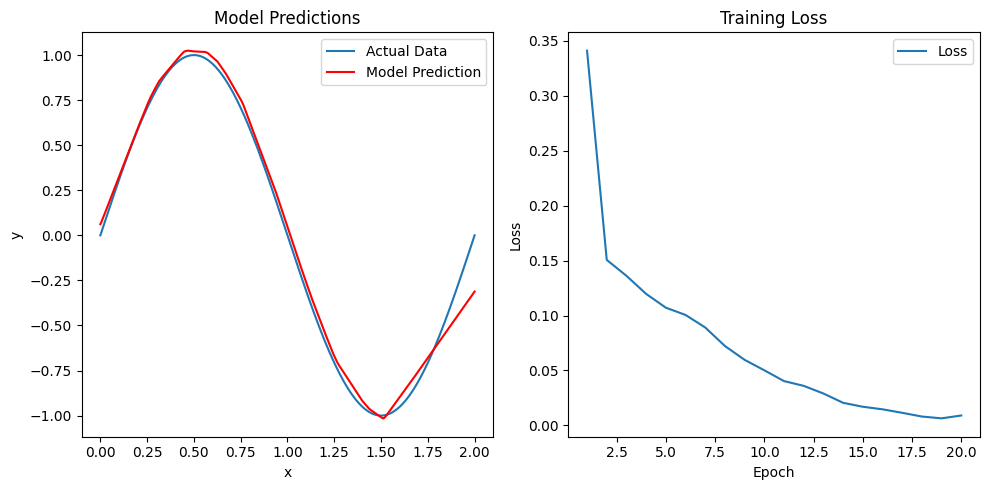

In [ ]:
# Define the neural network model
model = tf.keras.Sequential([
    # Fully connected layer with relu activation
    tf.keras.layers.Dense(50, activation='relu', input_shape=(1,)),

    # Fully connected layer with relu activation
    tf.keras.layers.Dense(50, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# Define the loss function
model.compile(optimizer=optimizer, loss="mse")

losses = []
# Custom callback for real-time visualization
class real_time_visualization(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        losses.append(logs.get('loss'))
        predictions = model.predict(x)

        clear_output(wait=True)  # Clear the output to update the plot
        plt.figure(figsize=(10, 5))

        # Plot the predictions vs actual data
        plt.subplot(1, 2, 1)
        plt.plot(x, y, label='Actual Data')
        plt.plot(x, predictions, color='red', label='Model Prediction')
        plt.title('Model Predictions')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        # Plot the loss
        plt.subplot(1, 2, 2)
        plt.plot(range(1, epoch + 2), losses, label='Loss')
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Fit the model with the custom callback
model.fit(x, y, epochs=30, batch_size=32, callbacks=[real_time_visualization()], verbose=0)